# **Week 7 Project**
## Author: Valerie Johnson
## Repository: [datafun-07-ml-predictive](https://github.com/Valpal84/datafun-07-ml-predictive)

### Task 4: Implement 10.16 and 15.4 from the text

#### **Part 1: 10.16- Intro to Data Science: Time Series and Simple Linear Regression**

##### Section 1-Load
- Follow the instructions to load NY City January high temperature from a CSV file into a DataFrame

In [72]:
# Import matplotlib
%matplotlib inline

In [73]:
# Create a lambda to calculate the celsius equivalents to fahrenheit temperatures
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

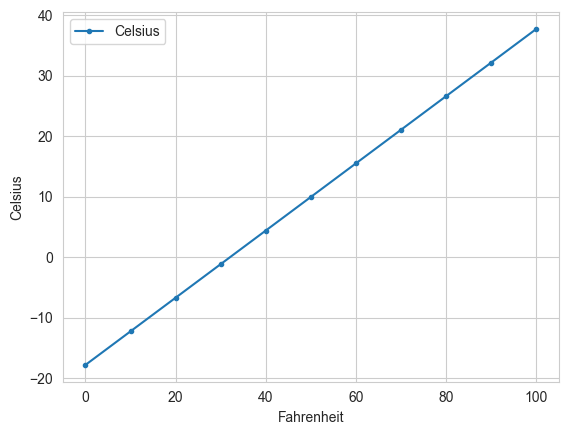

In [74]:
# Import Pandas and place data in a DataFrame
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


In [75]:
# Load the average high temperatures into a DataFrame
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

##### Section 2-View
- Follow the instructions to view the head and tail of the file

In [76]:
# View the head of the file
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [77]:
# View the tail of the file
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


##### Section 3-Clean
- Follow the instructions to clean the data

In [78]:
# Cleaning the data
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [79]:
# Checking a column type
nyc.Date.dtype

dtype('int64')

In [80]:
# Performing integer division on every element of the series
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Section 4-Describe
- Calculate basic descriptive stats for the dataset

In [81]:
# Calculate basic descriptive stats
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

##### Section 5-Calculate Line
- Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data

In [82]:
# Import function to perform linear regression
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [83]:
# Find slope
linear_regression.slope

0.014771361132966163

In [84]:
# Find intercept
linear_regression.intercept

8.694993233674289

##### Section 6-Predict
- Use your results to predict the "average high temp in Jan" for the year 2026

In [85]:
# Predict high temp in Jan for 2026 using y=mx+b
# y is the value we're looking for, m is the slope, x is the year (2026), b is the intercept
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

##### Section 7-Plot
- Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed

(10.0, 70.0)

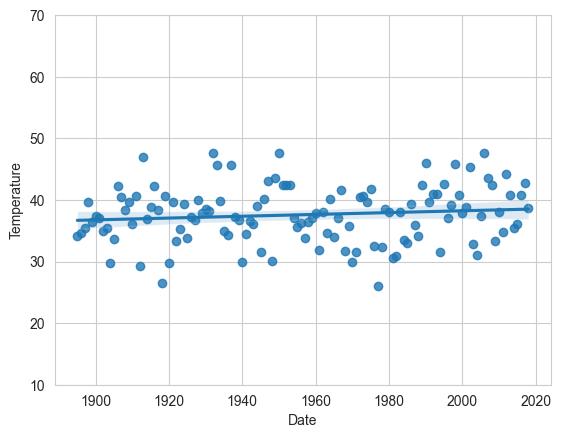

In [86]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

#### **Part 2: Machine Learning**
- 15.4 Case Study: Time Series and Simple Linear Regression

##### Section 1: Load

In [87]:
#Install imports
%matplotlib inline
import pandas as pd

In [88]:
# Loading the average high temperatures into a DataFrame
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomoly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomoly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Section 2: Splitting the Data for Training and Testing

In [89]:
#Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [90]:
#Confirm train/test split by checking shapes of X_train and X_test
X_train.shape

(93, 1)

In [91]:
X_test.shape

(31, 1)

##### Section 3: Training the Model

In [92]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [93]:
#Getting slope and intercept to make predictions
linear_regression.coef_

array([0.01939167])

In [94]:
linear_regression.intercept_

-0.30779820252656975

##### Section 4: Testing the Model

In [95]:
# Test the model by displaying predicted and expected values for every fifth element
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


##### Section 5: Predicting Future Temperatures and Estimating Past Temperatures

In [96]:
# Predict the Jan 2019 average high temp using y=mx + b. Whereas m is the coef_ and b is intercept_
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2019)

array([38.84399018])

In [97]:
predict(1890)

array([36.34246432])

##### Section 6: Vizualizing the Dataset with the Regression Line

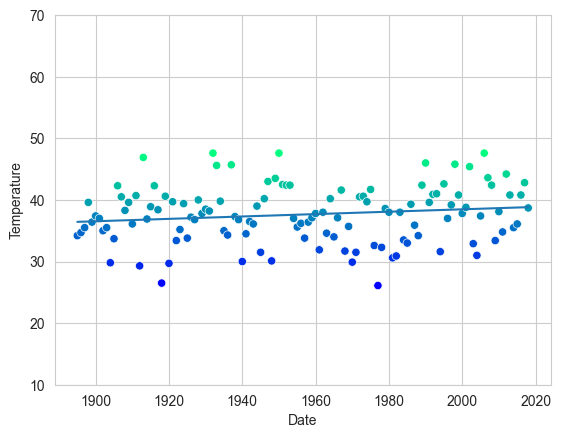

In [98]:
# Imports
import seaborn as sns
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

#Scale the y-axis so you can see the linear relationship better
axes.set_ylim(10, 70)

import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt
line = plt.plot(x, y)

##### Summary of findings: 
- Add remarks comparing the two methods of Scikit and SciPy:
     - The two methods were quite different, I feel that the Scikit section was a more in depth look at functions and planning of linear regression. Whereas the SciPy felt more like a basic mathematical function. It's almost like the difference of having a standard calculator and a graphing calculator, and the Scikit is the graphing calculator in this scenario. The Scikit feels so much like a graphing calculator because of entering the x and y values like you do when using the graphing calculator. 